<a href="https://colab.research.google.com/github/BohdanShepel2005/Mashynne-Navchannya/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%B7_%D0%9C%D0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [2]:
# Завантаження та попередня обробка
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Масштабування пікселів до діапазону [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

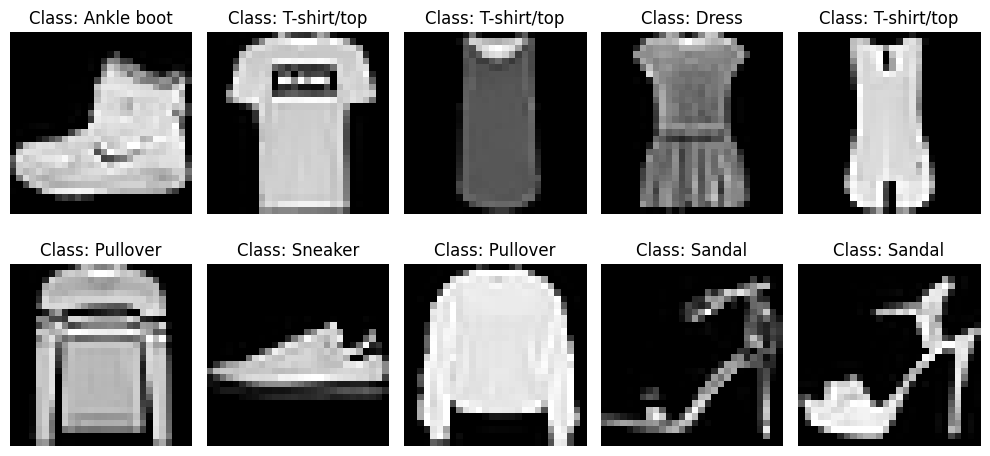

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Class: {class_names[y_train[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Створення моделі
model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(10, activation='softmax')  # Вихідний шар для 10 класів (наприклад, для MNIST)
])

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Категоріальне кодування міток
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,070,304 (7.90 MB)

 Trainable params: 689,610 (2.63 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 1,379,222 (5.26 MB)

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Навчання моделі
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=100,
    validation_data=(x_test, y_test_cat),
    callbacks=[early_stopping, reduce_lr]
)


# Збереження вагів моделі після тренування
model.save_weights('fashion_mnist_model.weights.h5')

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.7616 - loss: 0.6871 - val_accuracy: 0.6576 - val_loss: 0.9980 - learning_rate: 0.0010
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8732 - loss: 0.3479 - val_accuracy: 0.8864 - val_loss: 0.3021 - learning_rate: 0.0010
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8897 - loss: 0.3001 - val_accuracy: 0.8942 - val_loss: 0.2896 - learning_rate: 0.0010
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8990 - loss: 0.2712 - val_accuracy: 0.9065 - val_loss: 0.2479 - learning_rate: 0.0010
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9057 - loss: 0.2497 - val_accuracy: 0.9070 - val_loss: 0.2502 - learning_rate: 0.0010
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9128 - loss: 0.2341 - val_accuracy: 0.9071 - val_loss: 0.2498 - learning_rate: 0.0010
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9166 - loss: 

In [9]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# Збереження вагів моделі після тренування
model.save('fashion_mnist_model.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9344 - loss: 0.1987
Test accuracy: 0.9348000288009644
Test loss: 0.19054991006851196


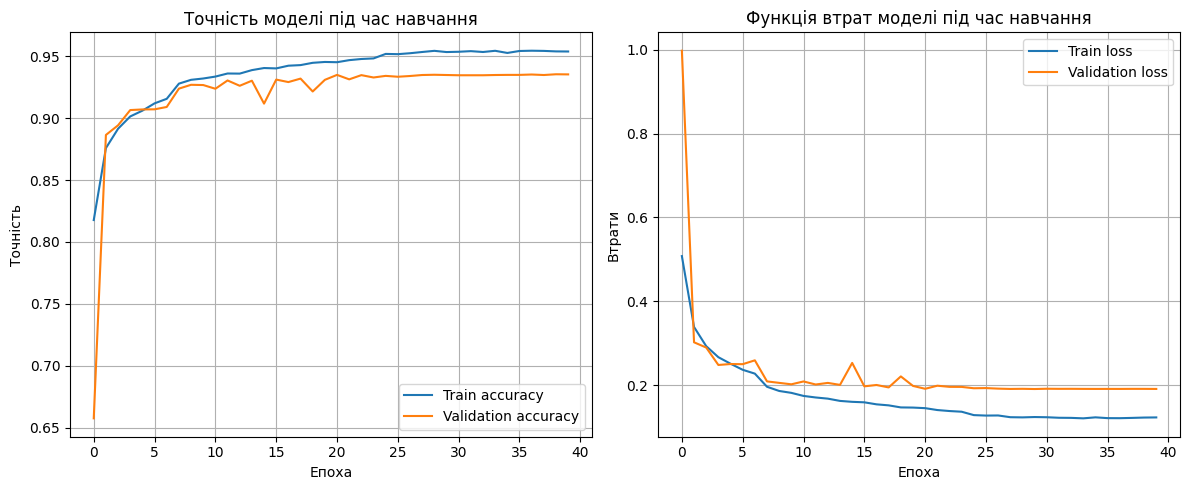

In [10]:
# Побудова графіку точності
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Точність моделі під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)

# Побудова графіку функції втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Функція втрат моделі під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


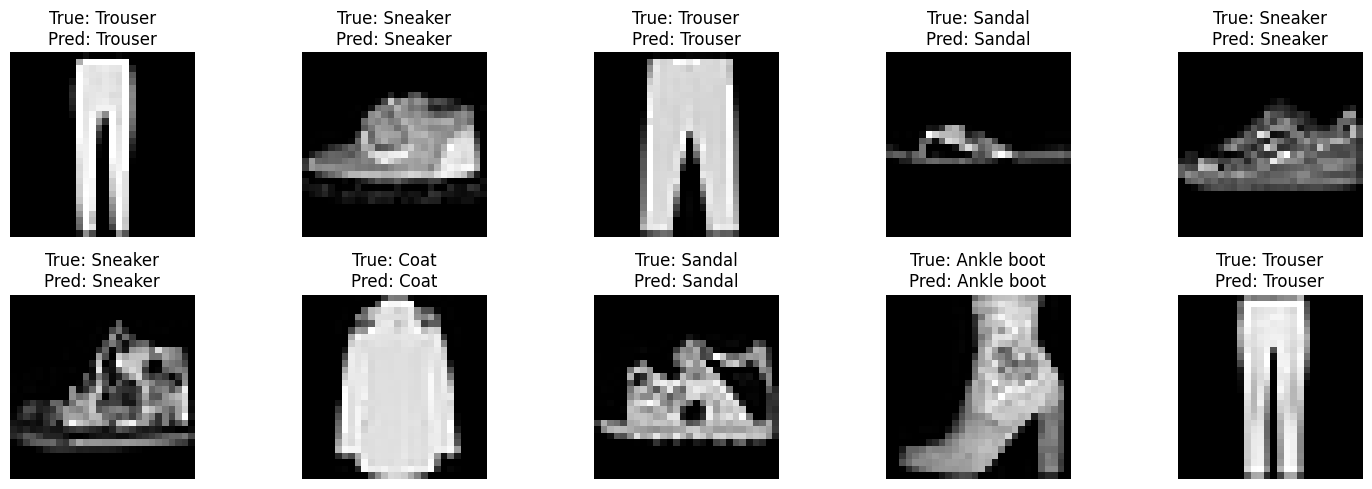

In [11]:
# Прогнозування
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Випадкові індекси
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)

# Виведення зображень
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    true_label = class_names[y_true_classes[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
plt.tight_layout()
plt.show()

У цій лабораторній роботі я навчив сідничну нейромережу розпізнавати зображення одягу з датасету Fashion MNIST. Провів попередню обробку даних та нормалізацію. Для поліпшення навчання використовував методи ранньої зупинки та зменшення швидкості навчання. Також застосував згорткові шари, пулінг та нормалізацію для підвищення точності. Після тренування перевірив модель на тестових даних та візуалізував результати, підтвердивши її високу точність  класифікації зображень.